## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [11]:
path = '/Users/balachandark/Desktop/Achievement 6'

In [12]:
df = pd.read_csv(os.path.join(path, 'Cleaned Data', 'clean_clv_data.csv'))

### 2. Data cleaning

In [14]:
df.columns

Index(['Unnamed: 0', 'customer_id', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employment_status', 'gender', 'income', 'region', 'marital_status',
       'monthly_premium', 'months_since_last_claim',
       'months_since_policy_inception', 'no_of_open_complaints',
       'no_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [15]:
df.head(20)

,Unnamed: 0,customer_id,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,...,months_since_policy_inception,no_of_open_complaints,no_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim,vehicle_class,vehicle_size
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-03-02,Employed,M,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2011-02-24,Employed,F,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,7,CF85061,Arizona,7216.100311,No,Premium,Master,2011-01-18,Unemployed,M,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,2011-01-26,Medical Leave,M,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,9,BQ94931,Oregon,7388.178085,No,Extended,College,2011-02-17,Employed,F,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [16]:
df.shape

(9134, 25)

##### Missing values

In [18]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Unnamed: 0                       0
customer_id                      0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
region                           0
marital_status                   0
monthly_premium                  0
months_since_last_claim          0
months_since_policy_inception    0
no_of_open_complaints            0
no_of_policies                   0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim                      0
vehicle_class                    0
vehicle_size                     0
dtype: int64

##### Duplicates check

In [20]:
dups = df.duplicated()

In [21]:
dups.shape # No dups

(9134,)

##### Extreme values checks

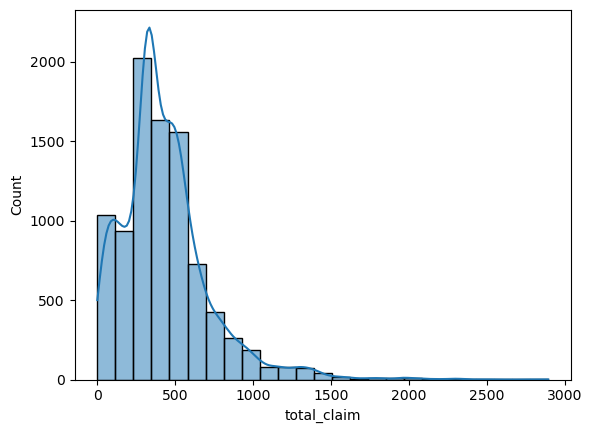

In [41]:
sns.histplot(df['total_claim'], bins=25, kde=True) # Shows extreme values
plt.show()
# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [29]:
df['total_claim'].mean() # Check the mean

434.0887943128969

In [31]:
df['total_claim'].median() # Check the median

383.94543350000004

In [33]:
df['total_claim'].max() # Check the max

2893.239678

### 3. Data prep for regression analysis 

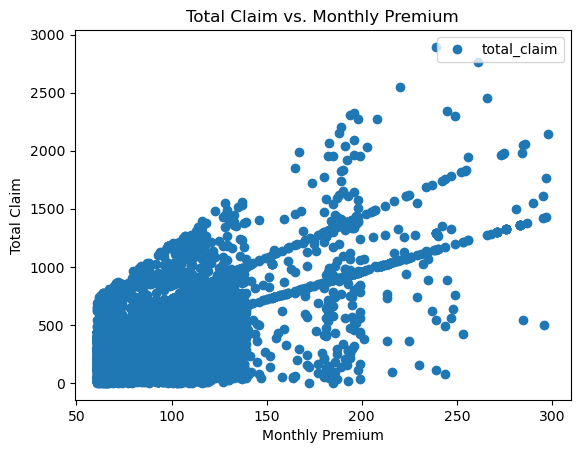

In [37]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'monthly_premium', y='total_claim',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Total Claim vs. Monthly Premium')  
plt.xlabel('Monthly Premium')  
plt.ylabel('Total Claim')  
plt.show()

In [39]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['monthly_premium'].values.reshape(-1,1)
y = df['total_claim'].values.reshape(-1,1)

In [41]:
X

array([[ 69],
       [ 94],
       [108],
       ...,
       [ 85],
       [ 96],
       [ 77]])

In [43]:
y

array([[ 384.811147],
       [1131.464935],
       [ 566.472247],
       ...,
       [ 790.784983],
       [ 691.2     ],
       [ 369.6     ]])

In [45]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [ ]:
## Hypothesis 1: Increase in the monthly premium paid increase the total claims of the customers.

In [47]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [49]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [51]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

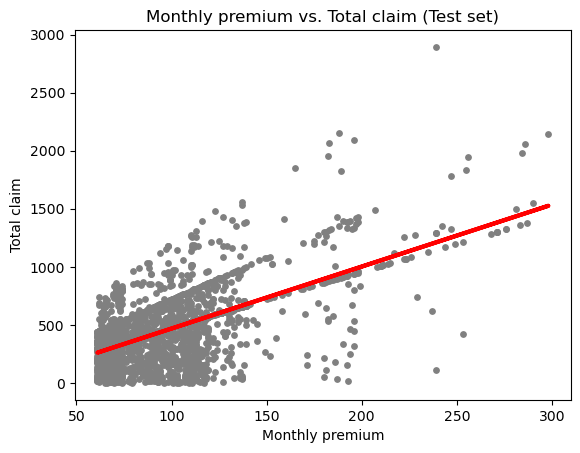

In [55]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Monthly premium vs. Total claim (Test set)')
plot_test.ylabel('Total claim')
plot_test.xlabel('Monthly premium')
plot_test.show()

In [57]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [59]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[5.33497918]]
Mean squared error:  51237.333601440056
R2 score:  0.3911645140361213


In [63]:
y_predicted

array([[308.91335587],
       [298.2433975 ],
       [570.32733575],
       ...,
       [522.31252312],
       [330.25327259],
       [319.58331423]])

In [65]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,336.000000,308.913356
1,489.600000,298.243398
2,571.200000,570.327336
3,2893.239678,1210.524838
4,907.200000,607.672190
5,765.566699,554.322398
6,419.750892,532.982481
7,386.520235,436.952856
8,446.400000,431.617877
9,633.600000,404.942981


##### Compare how the regression fits the training set

In [67]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [69]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [71]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[5.33497918]]
Mean squared error:  50436.98353533629
R2 score:  0.40286552484225435


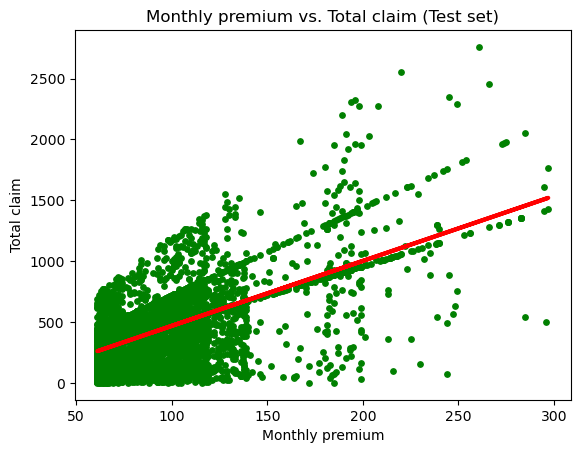

In [75]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Monthly premium vs. Total claim (Test set)')
plot_test.ylabel('Total claim')
plot_test.xlabel('Monthly premium')
plot_test.show()

### Bonus: performance improvement after removing outliers

In [79]:
## Outlier detection formula

def determine_outlier_thresholds_std(dataframe, col_name):
    upper_boundary = dataframe[col_name].mean() + 3 * dataframe[col_name].std()
    lower_boundary = dataframe[col_name].mean() - 3 * dataframe[col_name].std()
    return lower_boundary, upper_boundary

determine_outlier_thresholds_std(df, 'total_claim')

(-437.4114810964445, 1305.5890697222383)

In [81]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['total_claim'] <=1350.60] 

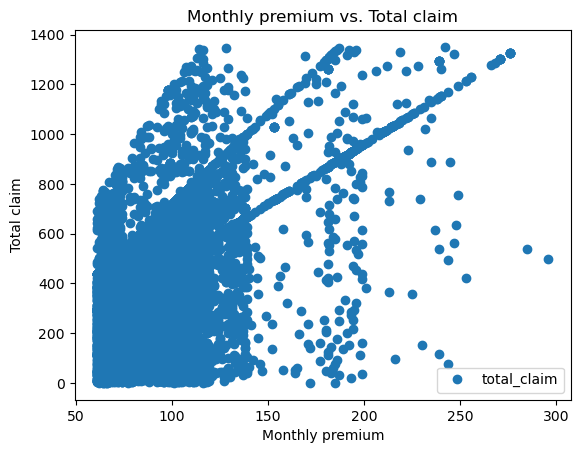

In [83]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'monthly_premium', y='total_claim', style='o')  
plt.title('Monthly premium vs. Total claim')  
plt.xlabel('Monthly premium')  
plt.ylabel('Total claim')  
plt.show()

In [85]:
# Reshape again.

X_2 = df_test['monthly_premium'].values.reshape(-1,1)
y_2 = df_test['total_claim'].values.reshape(-1,1)

In [87]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [89]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [91]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [93]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [95]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.49345344]]
Mean squared error:  43626.567232972346
R2 score:  0.2934348733848072


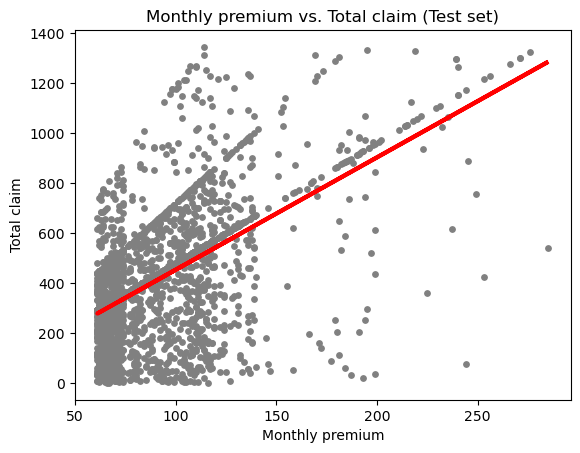

In [97]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Monthly premium vs. Total claim (Test set)')
plot_test.ylabel('Total claim')
plot_test.xlabel('Monthly premium')
plot_test.show()

In [99]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,350.400000,331.740005
1,566.400000,533.945410
2,274.114843,282.312017
3,297.600000,282.312017
4,566.935022,381.167993
5,417.600000,394.648353
6,251.075981,313.766191
7,640.800000,403.635260
8,642.773149,466.543608
9,431.320520,304.779284


## Interpretations of the output:

## Results before outlier removal

##### Slope: [[5.33497918]]
##### Mean squared error:  51237.333601440056
##### R2 score:  0.3911645140361213

###### The results presented here informs us that increase in 1 unit of monthly premium has 5.33 times increase on the total claim by the users. The R2 of 0.39 indicates that the monthly premium explains around 39% of variance of the total claim variable. Further, the MSE value seems to be higher. However, it has to compared with the next model to see if this model is better than the second model. 


## Results after outlier removal

##### Slope: [[4.49345344]]
##### Mean squared error:  43626.567232972346
##### R2 score:  0.2934348733848072


###### The results presented here informs us that increase in 1 unit of monthly premium has 4.49 times increase on the total claim by the users. After the outlier removal, we see a significant change in the slope value. Additionally, the R2 of 0.29 indicates that the monthly premium explains around 29% of variance of the total claim variable. This informs us that around 10% of the variance explained were due to outliers. The second model is better compared to the previous model. Finally, these model comparisons informs us that we have to carefully evaluate models and examine the data for potential outliers.

## Data bias
##### There are no possibility of data bias as the monthly premium and total claims are properly recorded information based on appropriate evidences.
